# Problem statement

Our Client WOMart is a leading nutrition and supplement retail chain that offers a comprehensive range of products for all our
wellness and fitness needs. 

WOMart follows a multi-channel distribution strategy with 350+ retail stores spread across 100+ cities. 

Effective forecasting for store sales gives essential insight into upcoming cash flow, meaning WOMart can more accurately plan
the cashflow at the store level.

Sales data for 18 months from 365 stores of WOMart is available along with information on Store Type, Location Type for each
store, Region Code for every store, Discount provided by the store on every day, Number of Orders everyday etc.

Our task is to predict the store sales for each store in the test set for the next two months.

# Table of content

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Data Cleaning__
    
* __Step 4: Exploratory Data Analysis__
    
* __Step 5: Feature Engineering__

* __Step 6: Building Model__

* __step 7: Hyperparameter Tuning__

* __step 8: Model performance__

### Step 1: Importing the Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Step 2: Data Inspection

In [2]:
train=pd.read_csv('C:/Users/virendra/Downloads/Class Recordings/First_Model/TRAIN.csv')
test=pd.read_csv('C:/Users/virendra/Downloads/Class Recordings/First_Model/TEST_FINAL.csv')

In [3]:
train.shape,test.shape

((188340, 10), (22265, 8))

* __We have 188340 rows and 10 columns in Train set whereas Test set has 22265 rows and 8 columns.__

In [4]:
train.head(3)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


* __What we have:__
    * __We have two id columns: ID and Store_id__
    * __we have one date column: Date__
    * __We have some categorical columns: Store_Type,Location_Type,Region_Code,Holiday,Discount__
    * __we have two numerical columns: #Order,Sales.__

In [6]:
train['Date']=pd.to_datetime(train['Date'])

* __We changed the data type correctly for Store_id and Date columns in Train dataset.__

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


In [8]:
test['Date']=pd.to_datetime(train['Date'])

* __We changed the data type correctly for Date column in Test dataset.__

In [9]:
# ratio of null values
train.isnull().sum()/train.shape[0]*100

ID               0.0
Store_id         0.0
Store_Type       0.0
Location_Type    0.0
Region_Code      0.0
Date             0.0
Holiday          0.0
Discount         0.0
#Order           0.0
Sales            0.0
dtype: float64

In [10]:
# ratio of null values
test.isnull().sum()/test.shape[0]*100

ID               0.0
Store_id         0.0
Store_Type       0.0
Location_Type    0.0
Region_Code      0.0
Date             0.0
Holiday          0.0
Discount         0.0
dtype: float64

* __We do not have any missing value in Train set and Test set.__

In [11]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 5
Numerical Features in Train Set: 4


In [12]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 5
Numerical Features in Train Set: 2


### Step 3: Data Cleaning

* __As we have seen above we do not have any missing value in Training and Testing dataset. It means our data is cleaned data. And almost all features are categorical,therefore we do not have outliers in this dataset except #Order feature which is numerical and it will be discussed below.__

### Step 4: Exploratory Data Analysis

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             188340 non-null  object        
 1   Store_id       188340 non-null  int64         
 2   Store_Type     188340 non-null  object        
 3   Location_Type  188340 non-null  object        
 4   Region_Code    188340 non-null  object        
 5   Date           188340 non-null  datetime64[ns]
 6   Holiday        188340 non-null  int64         
 7   Discount       188340 non-null  object        
 8   #Order         188340 non-null  int64         
 9   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 14.4+ MB


In [14]:
train.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')

In [15]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [16]:
train['Store_Type'].value_counts()

S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64

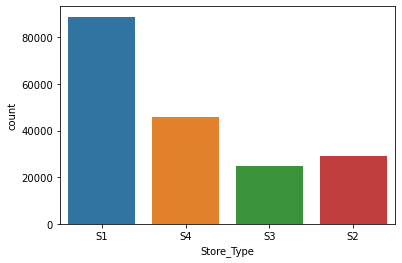

In [17]:
sns.countplot(train['Store_Type']);

* __From above graph it is clearly seen S1 store has several branches which is followed by S4,S2,S3 stores.__

In [18]:
train['Location_Type'].value_counts()

L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64

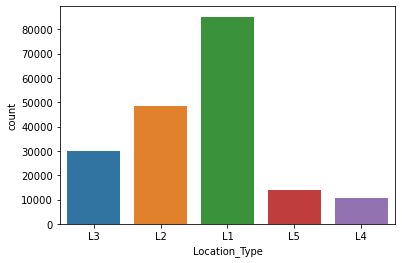

In [19]:
sns.countplot(train['Location_Type']);

* __We can clearly see the L1 location is most repeated location which is followed by L2,L3,L5 and L4 locations.__

In [20]:
train['Region_Code'].value_counts()

R1    63984
R2    54180
R3    44376
R4    25800
Name: Region_Code, dtype: int64

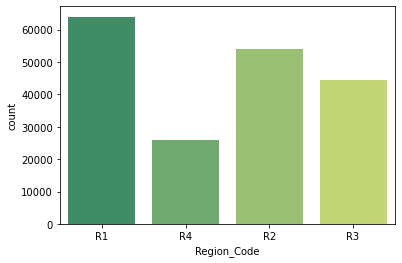

In [21]:
sns.countplot(train['Region_Code'],palette='summer');

* __We can clearly see here the R1 region is most repeated region which is followed by R2,R3 and R4 regions.__

In [22]:
train['Holiday'].value_counts()

0    163520
1     24820
Name: Holiday, dtype: int64

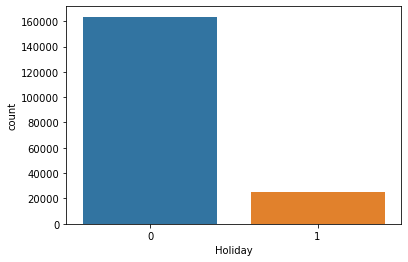

In [23]:
sns.countplot(train['Holiday']);

* __we have very less holidays with compare to weekdays as shown above.__

In [24]:
train['Discount'].value_counts()

No     104051
Yes     84289
Name: Discount, dtype: int64

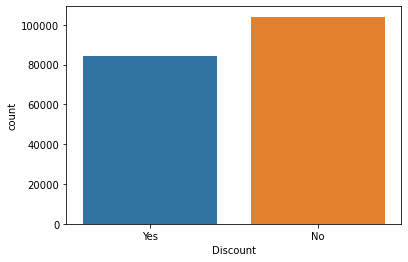

In [25]:
sns.countplot(train['Discount']);

* __Stores which are not providing discounts are slightly more in number than stores which are providing discount.__  

### Relationship between categorical columns and target column(Sales)

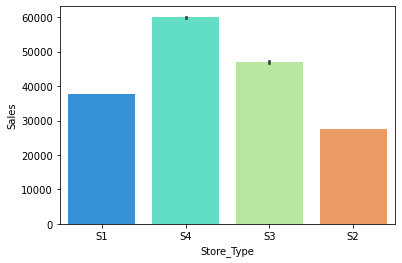

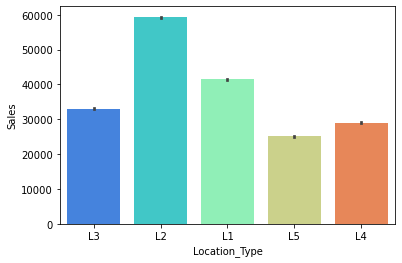

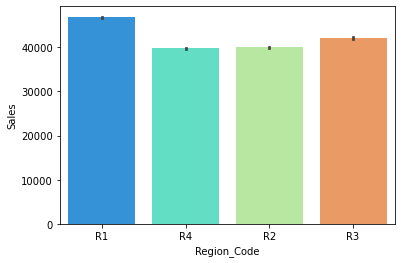

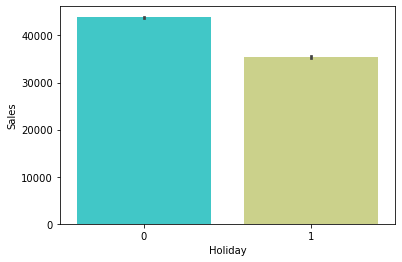

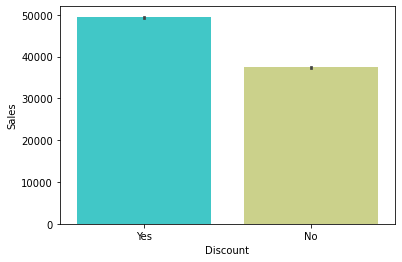

In [26]:
for i in ['Store_Type','Location_Type','Region_Code','Holiday','Discount']:
    
    sns.barplot(x=i,y='Sales',data=train,palette='rainbow')
    plt.show()

* __As we have seen in above graphs:__
    * __Store S4 has maximum sales more than other stores__
    * __Location L2 has maximum sales more than other locations__
    * __Region R1 has maximum sales more than other regions__
    * __Stores are having more sales on working days rather than holidays(obviously there are less hoildays in a week)__
    * __Stores which are providing discounts are having more sales.__

### Relationship between numerical column and target column(Sales)

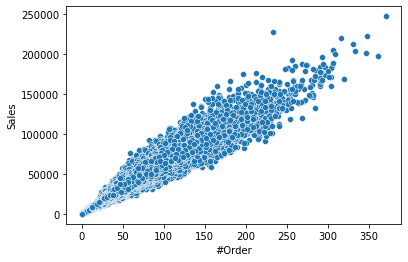

In [27]:
sns.scatterplot(x=train['#Order'],y=train['Sales']);

* __Here we can simply interpret this above graph: as #Orders are increasing, Sales are also increasing hence it's showing a 
    positive correlation.__

In [28]:
test.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount'],
      dtype='object')

* __As we can see above #Order column is not present in Test dataset that's why this column can be dropped in Train dataset
otherwise we will get some unwanted errors while predicting the test dataset.__

In [29]:
train.drop(columns='#Order',inplace=True)

### Step 5 : Feature Engineering

In [30]:
train['Discount']=train['Discount'].map({'Yes':1,'No':0})

In [31]:
test['Discount']=test['Discount'].map({'Yes':1,'No':0})

* __Above Discount column is converted into numerical column for Train and Test Dataset.__

In [32]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,1,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,1,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,1,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,1,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,1,45614.52


* __Dummy Encoding for some categorical variables:-.__ 

In [33]:
store_type=pd.get_dummies(train['Store_Type'],prefix='Store')

In [34]:
store_type_test=pd.get_dummies(test['Store_Type'],prefix='Store')

In [35]:
location_type=pd.get_dummies(train['Location_Type'],prefix='Location')
region_code=pd.get_dummies(train['Region_Code'],prefix='Region')

In [36]:
location_type_test=pd.get_dummies(test['Location_Type'],prefix='Location')
region_code_test=pd.get_dummies(test['Region_Code'],prefix='Region')

* __Now,these dummy encoded columns have been added in train and test dataset.__

In [37]:
train=train.join([store_type,location_type,region_code])

In [38]:
test=test.join([store_type_test,location_type_test,region_code_test])

* __Here we are dropping these original categorical columns because these columns have already beeen converted into numerical columns.__

In [39]:
train.drop(columns=['ID','Store_id','Store_Type','Location_Type','Region_Code','Date'],inplace=True)

In [40]:
test.drop(columns=['ID','Store_id','Store_Type','Location_Type','Region_Code','Date'],inplace=True)

### Feature Importance

In [41]:
# seperate features and Target
X=train.drop(columns='Sales')
y=train['Sales']

* __Feature Importance using RandomForest.__

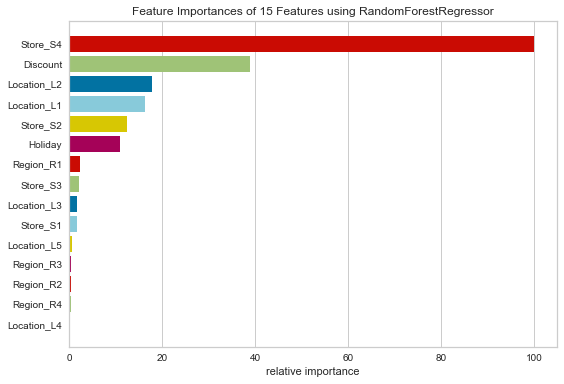

In [42]:
from yellowbrick.features import FeatureImportances
from sklearn.ensemble import RandomForestRegressor

rfc=RandomForestRegressor()
viz=FeatureImportances(rfc)
viz.fit(X,y)
viz.poof();

* __Store_S4,Discount,Location_L2,Location_L1,Store_S2 and Holiday are most important features for predicting Sales.__

### Step 6: Building Model

In [43]:
X.head()

,Holiday,Discount,Store_S1,Store_S2,Store_S3,Store_S4,Location_L1,Location_L2,Location_L3,Location_L4,Location_L5,Region_R1,Region_R2,Region_R3,Region_R4
0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0
1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0
2,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0
4,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1


In [44]:
# seperate features and Target
X=X
y=train['Sales']

In [45]:
# 30% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3,random_state=30)

In [46]:
# Model Building
features= X.columns
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_valid)
coef = pd.Series(LR.coef_,features).sort_values()


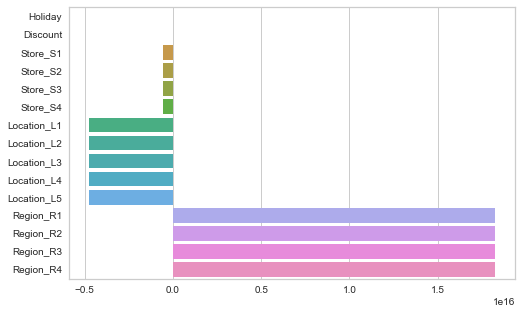

In [47]:
# Barplot for coefficients
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,features);

* __All stores,all locations and all regions are the most important attributes to determine store sales.__

### Trying some models for better performance:

In [48]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [49]:
algos = [ LinearRegression(),  Ridge(), Lasso(),  DecisionTreeRegressor(),  RandomForestRegressor(),  XGBRegressor(),
          KNeighborsRegressor() ]

names = [ 'LinearRegression',  'Ridge', 'Lasso',  'DecisionTreeRegressor',  'RandomForestRegressor',  'XGBRegressor',
          'KNeighborsRegressor' ]

msle_list = []

In [50]:
for model in algos:
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    y_pred[y_pred<0]=0
    MSLE= metrics.mean_squared_log_error(y_valid,y_pred)
    msle_list.append(MSLE)
   

In [51]:
evaluation = pd.DataFrame( {'Model': names, 'MSLE': msle_list} )

In [52]:
evaluation

,Model,MSLE
0,LinearRegression,0.119804
1,Ridge,0.119767
2,Lasso,0.119763
3,DecisionTreeRegressor,0.117114
4,RandomForestRegressor,0.117130
5,XGBRegressor,0.117113
6,KNeighborsRegressor,0.127287


In [53]:
evaluation.min()

Model    DecisionTreeRegressor
MSLE                  0.117113
dtype: object

* As we can clearly see DecisionTree,RandomForest and xgboost perform better almost same rather than other models.So we can use any one of them,let's take DecisionTree ahead.

### Step 7: Hyperparametere Tuning using RandomizedSearchCV

In [54]:
params= {   'min_samples_split': [1,2,3,4,5,6,7,8,9],
            'min_samples_leaf': [1,2,3,4,5,6,7,8,9],
            'max_features': ["auto", "sqrt", "log2"],
            'ccp_alpha': [0.0,0.01,0.04,0.06,0.08,0.1,0.3,0.5,0.7]
        }

In [55]:
from sklearn.model_selection import RandomizedSearchCV

randomized= RandomizedSearchCV( DecisionTreeRegressor(),
                                params,
                                n_iter=100,
                                scoring='neg_mean_squared_log_error',
                                cv=5,
                                verbose=2 )
randomized.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ccp_alpha=0.5, max_features=sqrt, min_samples_leaf=5, min_samples_split=7; total time=   0.1s
[CV] END ccp_alpha=0.5, max_features=sqrt, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV] END ccp_alpha=0.5, max_features=sqrt, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV] END ccp_alpha=0.5, max_features=sqrt, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV] END ccp_alpha=0.5, max_features=sqrt, min_samples_leaf=5, min_samples_split=7; total time=   0.0s
[CV] END ccp_alpha=0.08, max_features=log2, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END ccp_alpha=0.08, max_features=log2, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END ccp_alpha=0.08, max_features=log2, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] END ccp_alpha=0.08, max_features=log2, min_samples_leaf=3, min_samples_split=8; total time=   0.0s
[CV] E

[CV] END ccp_alpha=0.08, max_features=auto, min_samples_leaf=7, min_samples_split=5; total time=   0.1s
[CV] END ccp_alpha=0.06, max_features=auto, min_samples_leaf=5, min_samples_split=3; total time=   0.1s
[CV] END ccp_alpha=0.06, max_features=auto, min_samples_leaf=5, min_samples_split=3; total time=   0.1s
[CV] END ccp_alpha=0.06, max_features=auto, min_samples_leaf=5, min_samples_split=3; total time=   0.1s
[CV] END ccp_alpha=0.06, max_features=auto, min_samples_leaf=5, min_samples_split=3; total time=   0.1s
[CV] END ccp_alpha=0.06, max_features=auto, min_samples_leaf=5, min_samples_split=3; total time=   0.1s
[CV] END ccp_alpha=0.0, max_features=log2, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV] END ccp_alpha=0.0, max_features=log2, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV] END ccp_alpha=0.0, max_features=log2, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV] END ccp_alpha=0.0, max_features=log2, min_samples_leaf=6, min_

[CV] END ccp_alpha=0.1, max_features=sqrt, min_samples_leaf=6, min_samples_split=9; total time=   0.0s
[CV] END ccp_alpha=0.1, max_features=sqrt, min_samples_leaf=6, min_samples_split=9; total time=   0.0s
[CV] END ccp_alpha=0.1, max_features=sqrt, min_samples_leaf=6, min_samples_split=9; total time=   0.0s
[CV] END ccp_alpha=0.1, max_features=sqrt, min_samples_leaf=6, min_samples_split=9; total time=   0.0s
[CV] END ccp_alpha=0.1, max_features=sqrt, min_samples_leaf=6, min_samples_split=9; total time=   0.0s
[CV] END ccp_alpha=0.08, max_features=auto, min_samples_leaf=8, min_samples_split=6; total time=   0.1s
[CV] END ccp_alpha=0.08, max_features=auto, min_samples_leaf=8, min_samples_split=6; total time=   0.2s
[CV] END ccp_alpha=0.08, max_features=auto, min_samples_leaf=8, min_samples_split=6; total time=   0.2s
[CV] END ccp_alpha=0.08, max_features=auto, min_samples_leaf=8, min_samples_split=6; total time=   0.1s
[CV] END ccp_alpha=0.08, max_features=auto, min_samples_leaf=8, min_s

[CV] END ccp_alpha=0.04, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.04, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.04, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.04, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.04, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.7, max_features=auto, min_samples_leaf=7, min_samples_split=5; total time=   0.1s
[CV] END ccp_alpha=0.7, max_features=auto, min_samples_leaf=7, min_samples_split=5; total time=   0.1s
[CV] END ccp_alpha=0.7, max_features=auto, min_samples_leaf=7, min_samples_split=5; total time=   0.1s
[CV] END ccp_alpha=0.7, max_features=auto, min_samples_leaf=7, min_samples_split=5; total time=   0.1s
[CV] END ccp_alpha=0.7, max_features=auto, min_samples_leaf=7, min_s

[CV] END ccp_alpha=0.06, max_features=log2, min_samples_leaf=8, min_samples_split=1; total time=   0.0s
[CV] END ccp_alpha=0.1, max_features=sqrt, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END ccp_alpha=0.1, max_features=sqrt, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END ccp_alpha=0.1, max_features=sqrt, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END ccp_alpha=0.1, max_features=sqrt, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END ccp_alpha=0.1, max_features=sqrt, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END ccp_alpha=0.01, max_features=log2, min_samples_leaf=9, min_samples_split=6; total time=   0.0s
[CV] END ccp_alpha=0.01, max_features=log2, min_samples_leaf=9, min_samples_split=6; total time=   0.0s
[CV] END ccp_alpha=0.01, max_features=log2, min_samples_leaf=9, min_samples_split=6; total time=   0.0s
[CV] END ccp_alpha=0.01, max_features=log2, min_samples_leaf=9, min_s

[CV] END ccp_alpha=0.7, max_features=auto, min_samples_leaf=7, min_samples_split=7; total time=   0.1s
[CV] END ccp_alpha=0.7, max_features=auto, min_samples_leaf=7, min_samples_split=7; total time=   0.1s
[CV] END ccp_alpha=0.7, max_features=auto, min_samples_leaf=7, min_samples_split=7; total time=   0.1s
[CV] END ccp_alpha=0.7, max_features=auto, min_samples_leaf=7, min_samples_split=7; total time=   0.1s
[CV] END ccp_alpha=0.7, max_features=auto, min_samples_leaf=7, min_samples_split=7; total time=   0.1s
[CV] END ccp_alpha=0.0, max_features=auto, min_samples_leaf=6, min_samples_split=8; total time=   0.1s
[CV] END ccp_alpha=0.0, max_features=auto, min_samples_leaf=6, min_samples_split=8; total time=   0.1s
[CV] END ccp_alpha=0.0, max_features=auto, min_samples_leaf=6, min_samples_split=8; total time=   0.1s
[CV] END ccp_alpha=0.0, max_features=auto, min_samples_leaf=6, min_samples_split=8; total time=   0.1s
[CV] END ccp_alpha=0.0, max_features=auto, min_samples_leaf=6, min_sample

[CV] END ccp_alpha=0.04, max_features=auto, min_samples_leaf=9, min_samples_split=1; total time=   0.0s
[CV] END ccp_alpha=0.3, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.1s
[CV] END ccp_alpha=0.3, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.1s
[CV] END ccp_alpha=0.3, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.1s
[CV] END ccp_alpha=0.3, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.1s
[CV] END ccp_alpha=0.3, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.1s
[CV] END ccp_alpha=0.01, max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, max_features=sqrt, min_samples_leaf=3, min_s

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=100,
                   param_distributions={'ccp_alpha': [0.0, 0.01, 0.04, 0.06,
                                                      0.08, 0.1, 0.3, 0.5,
                                                      0.7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9]},
                   scoring='neg_mean_squared_log_error', verbose=2)

In [56]:
randomized.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'ccp_alpha': 0.3}

In [57]:
randomized.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.3, max_features='log2', min_samples_leaf=2,
                      min_samples_split=8)

* __It's giving some best parameters for DecisionTree model which can make our model performance better.__ 

### Step 8: Finally Model performance

In [58]:
model= DecisionTreeRegressor( min_samples_split= 4,
                              min_samples_leaf= 2,
                              max_features='auto',
                              ccp_alpha= 0.3 
                            )
model.fit(X_train,y_train)
y_pred=model.predict(X_valid)

__MSLE__

In [59]:
y_pred[y_pred<0]=0

In [60]:
MSLE= metrics.mean_squared_log_error(y_valid,y_pred)
print("Mean Squared Log Error:",MSLE)

Mean Squared Log Error: 0.11711379823277991


* __Validation Set MSLE score is around 0.12 from this Decision Tree model__
* __This less error means our model is performing well.__

In [61]:
submission = pd.read_csv('C:/Users/virendra/Downloads/Class Recordings/First_Model/SAMPLE.csv')
final_predictions = model.predict(test)

In [64]:
submission['Sales'] = final_predictions

In [ ]:
#only positive predictions for the target variable
submission['Sales'] = submission['Sales'].apply(lambda x: 0 if x<0 else abs(x))
submission.to_csv('MY_Submission.csv', index=False)

In [66]:
submission['Sales'].describe()

count    22265.000000
mean     43343.444385
std      13886.613510
min      16810.451503
25%      33431.496269
50%      41848.284097
75%      51829.619482
max      78182.624023
Name: Sales, dtype: float64